# Noah Cina D207 Performance Assessment

Associated code attached below:

P value: 0.552733291902922. Accept null hypothesis for Income.


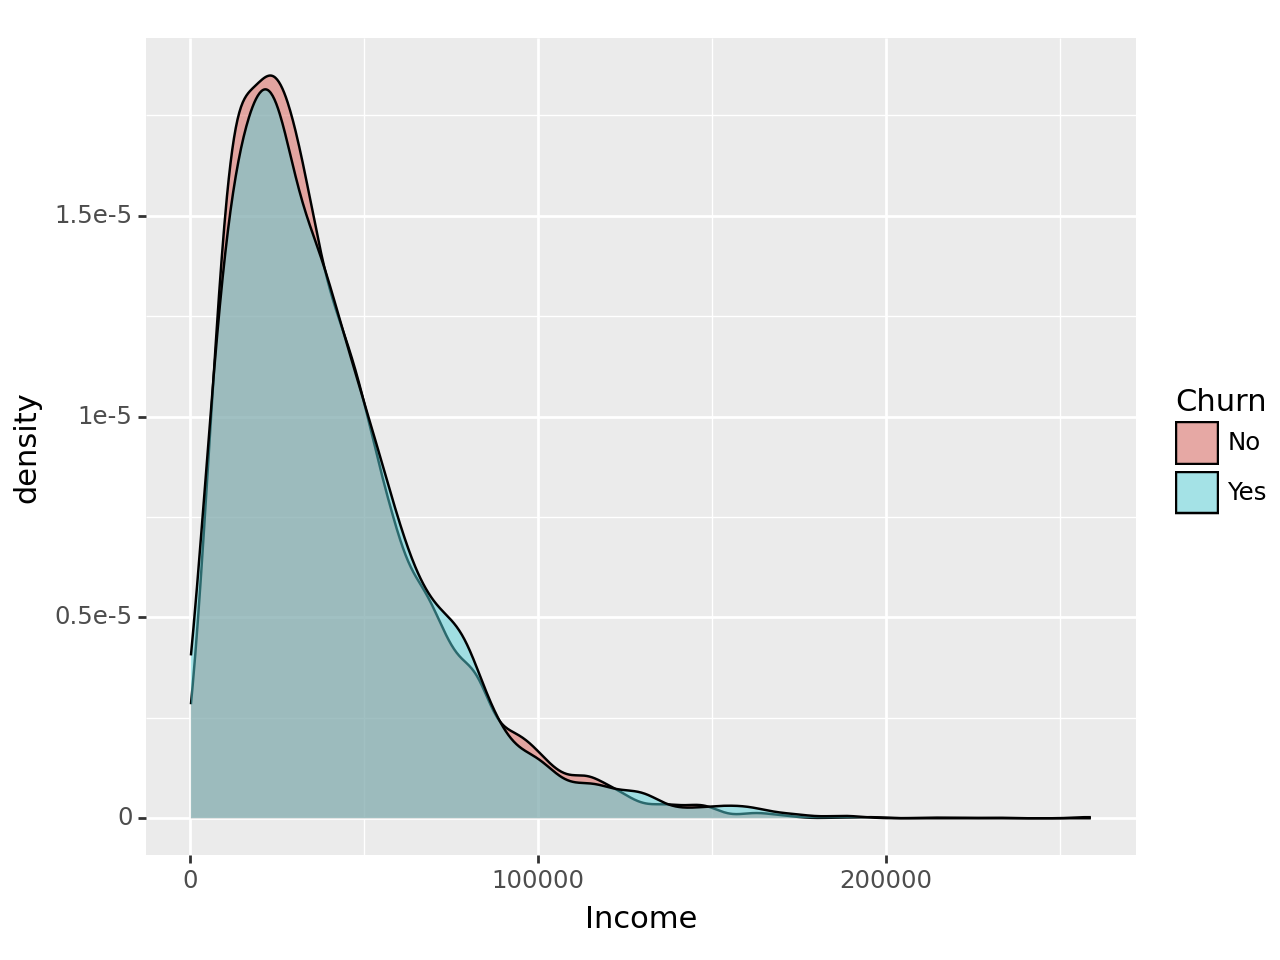


P value: 0.98752251103374. Accept null hypothesis for Outage_sec_perweek.


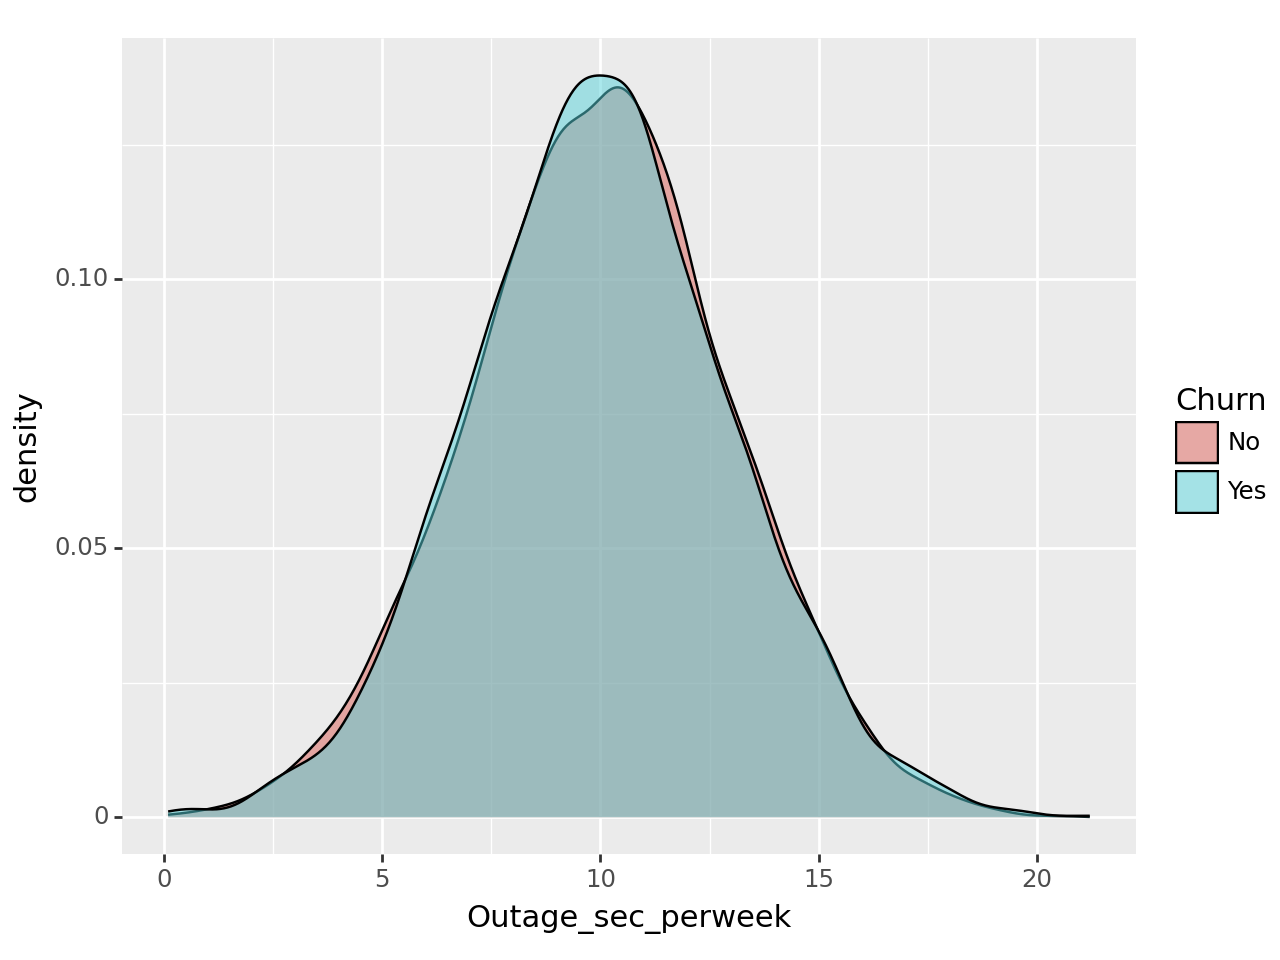


P value: 0.0. Reject null hypothesis for Tenure.


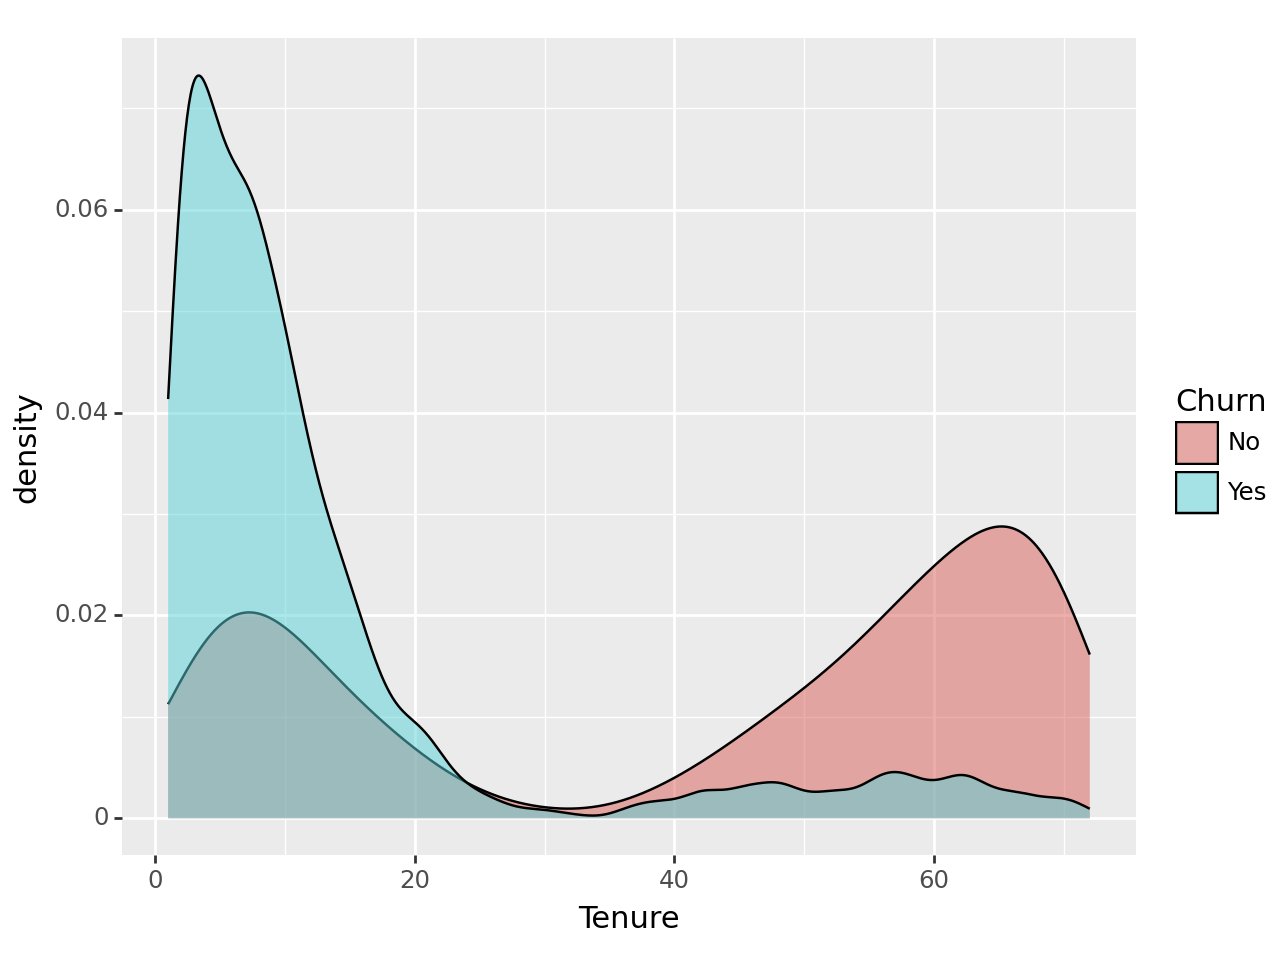


P value: 0.0. Reject null hypothesis for MonthlyCharge.


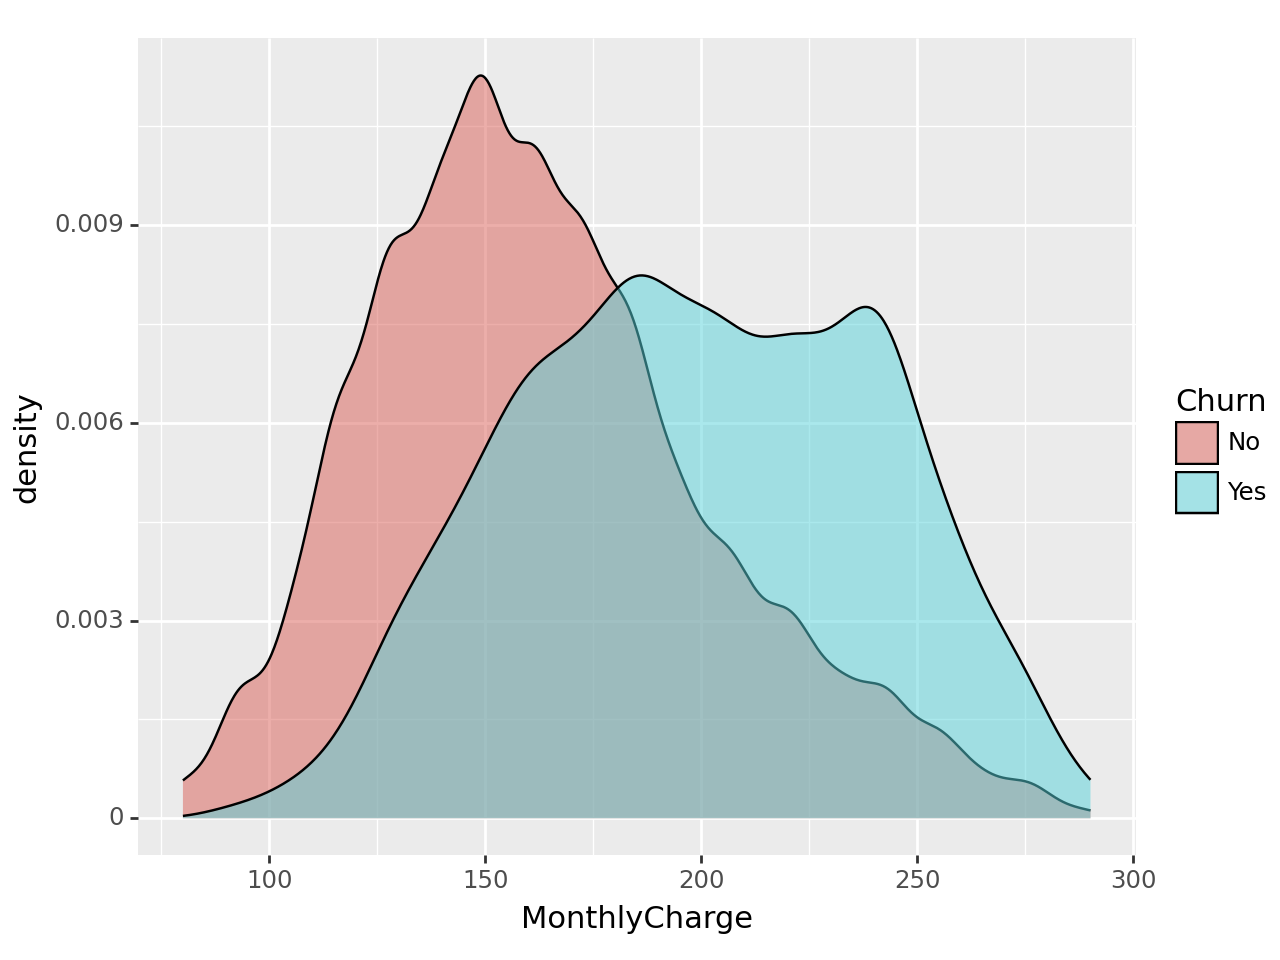


P value: 0.0. Reject null hypothesis for Bandwidth_GB_Year.


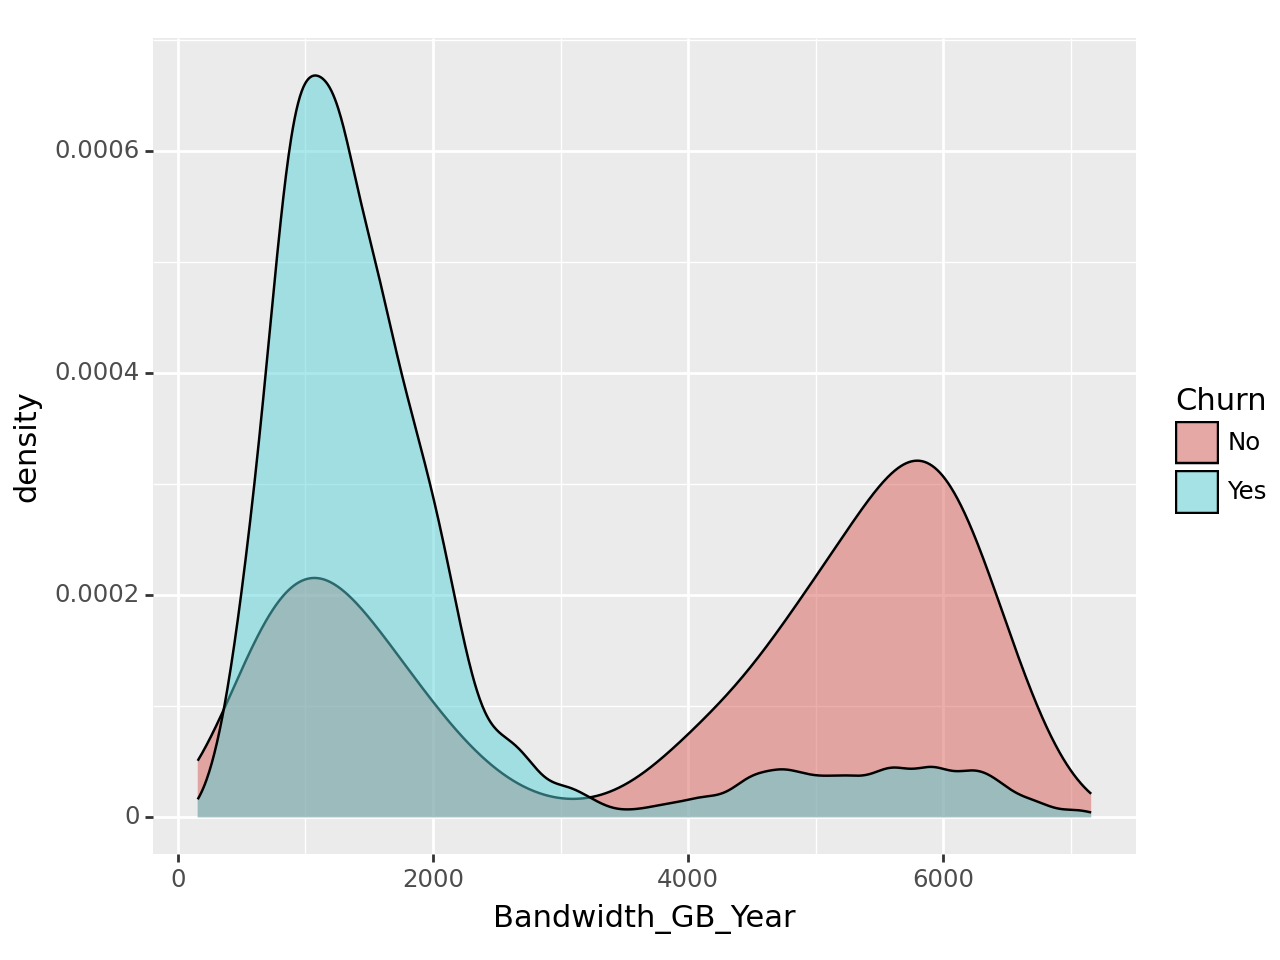

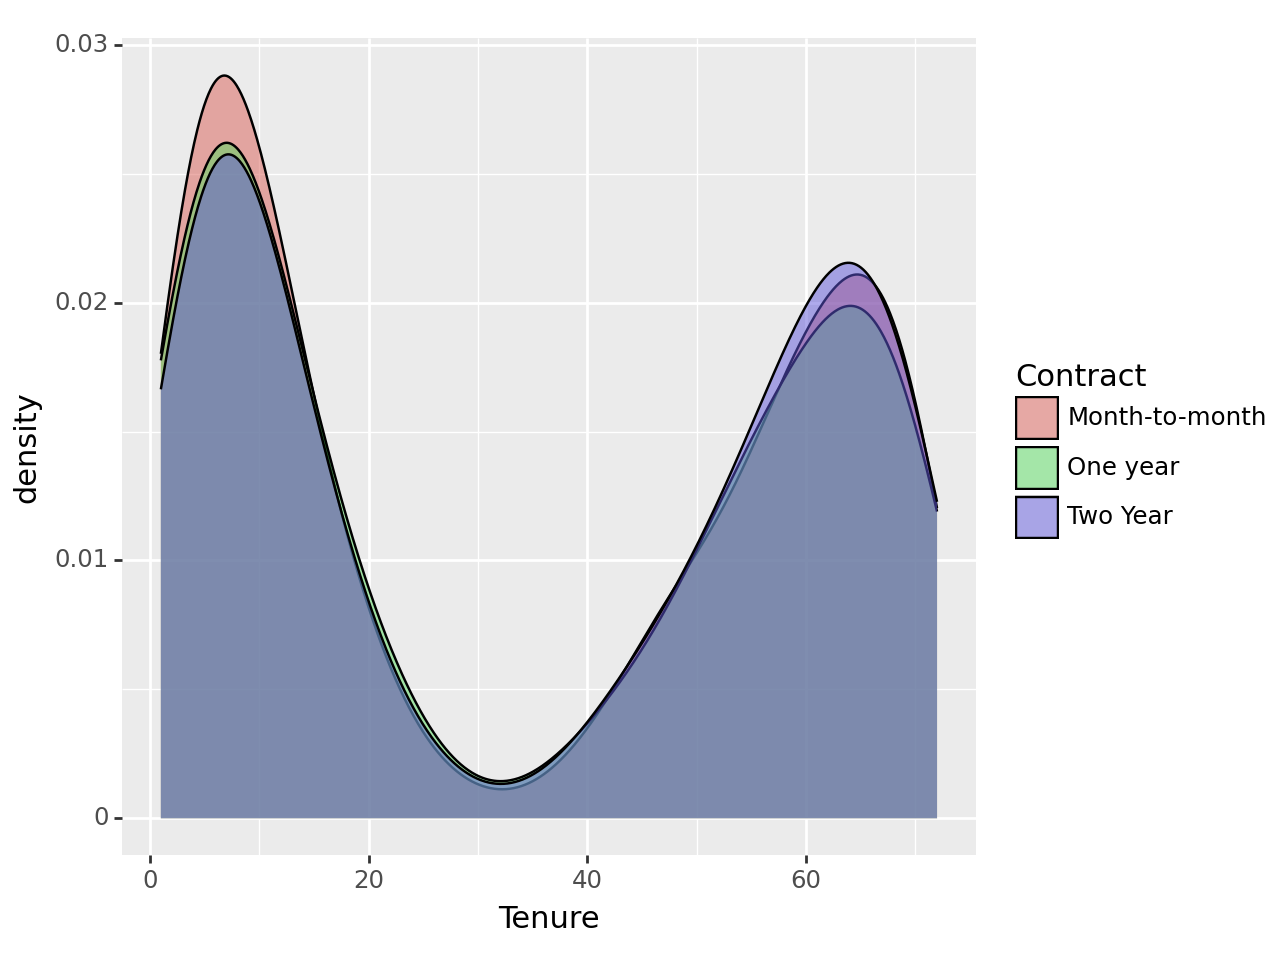

In [3]:
#Part B2 Code
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression

csv = pd.read_csv("churn_clean.csv")

test_variables = ["Income", "Outage_sec_perweek", "Tenure", "MonthlyCharge", "Bandwidth_GB_Year"]

#t test and density plot
for column in test_variables:
    #t test
    result = stats.ttest_ind(csv.loc[csv.Churn == "Yes", column], csv.loc[csv.Churn == "No", column])

    if result[1] < 0.05:
        print(f"P value: {result[1]}. Reject null hypothesis for {column}.")
    else:
        print(f"P value: {result[1]}. Accept null hypothesis for {column}.")

    #density plot on churn
    print(p9.ggplot(csv) + p9.aes(x=column, fill="Churn") + p9.geom_density(alpha=0.5))

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64


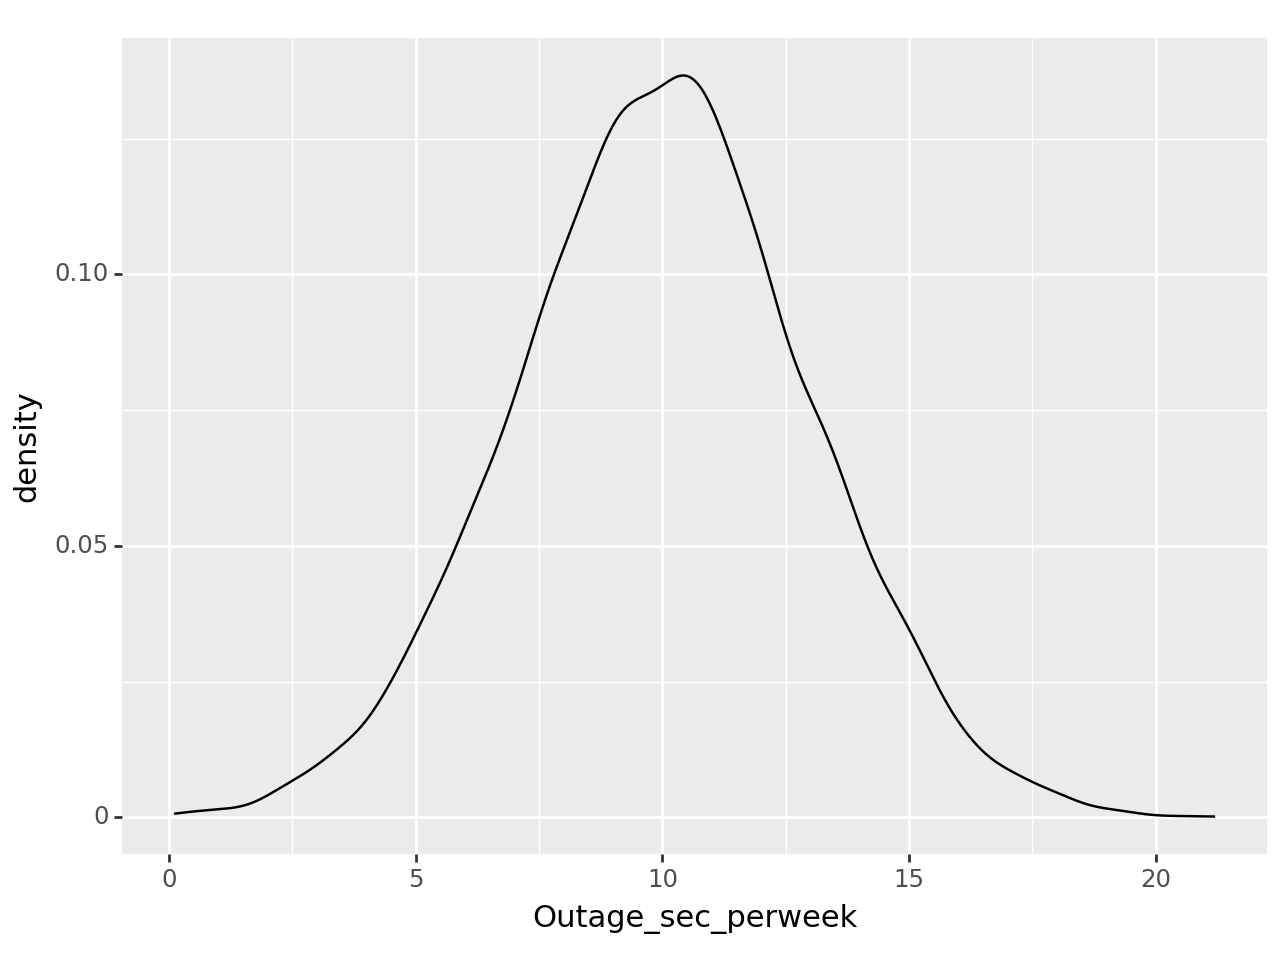


count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64


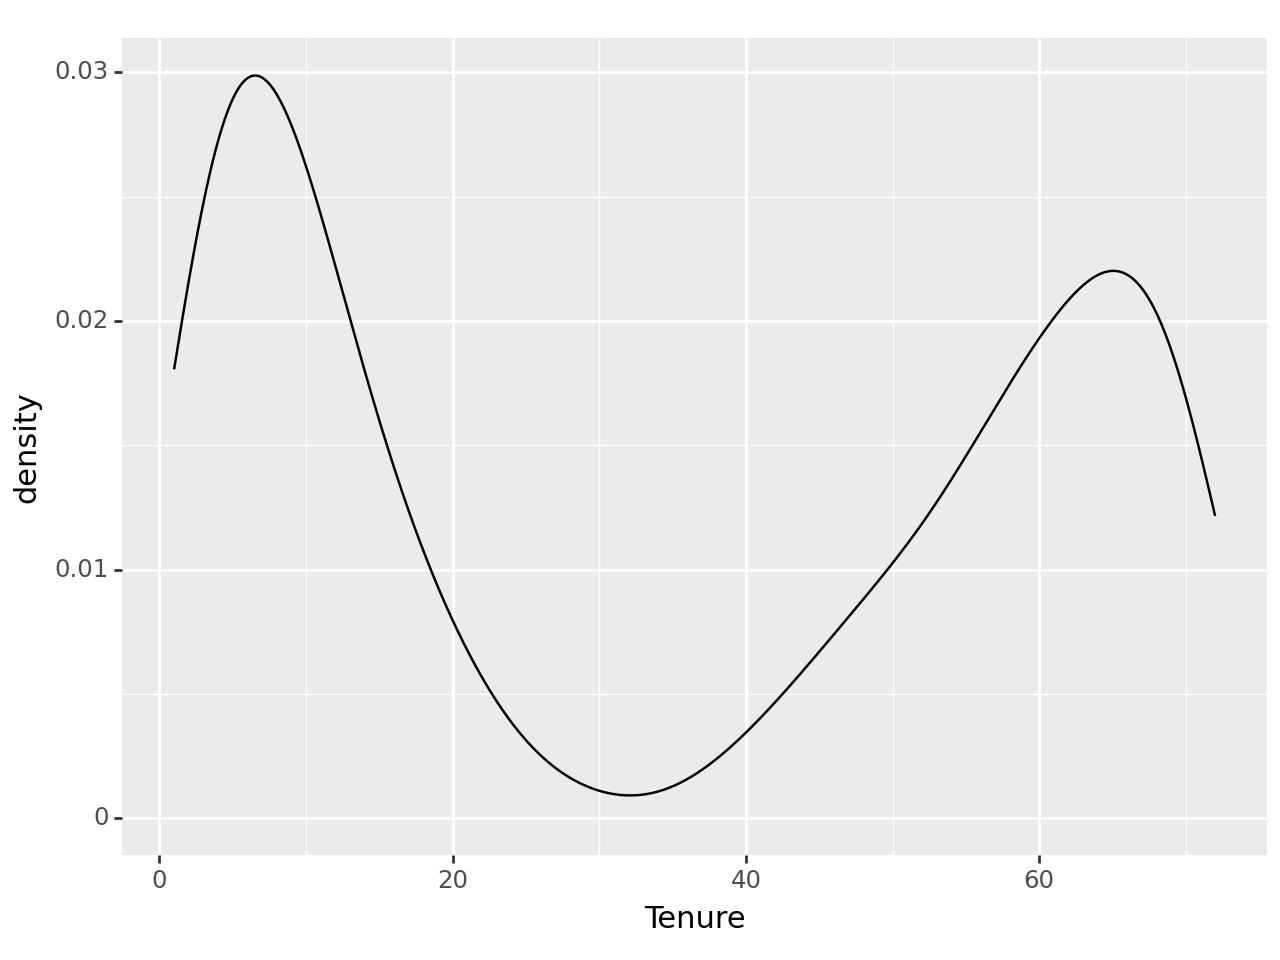


Churn
No     7350
Yes    2650
Name: count, dtype: int64


c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002719CC34360> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002719CC34360> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.


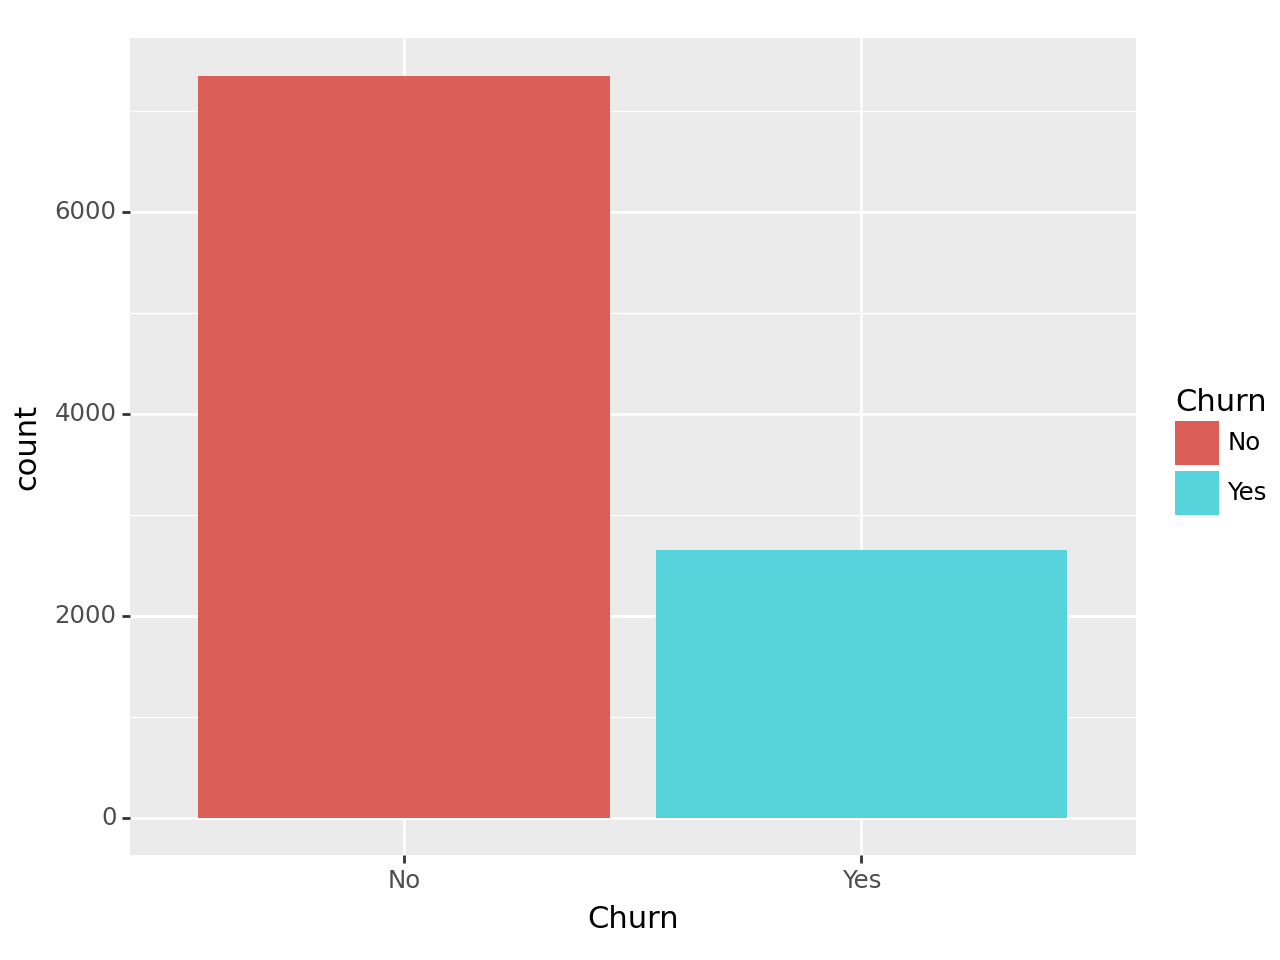


Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64


c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002719CC34360> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002719CC34360> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002719CC34360> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.


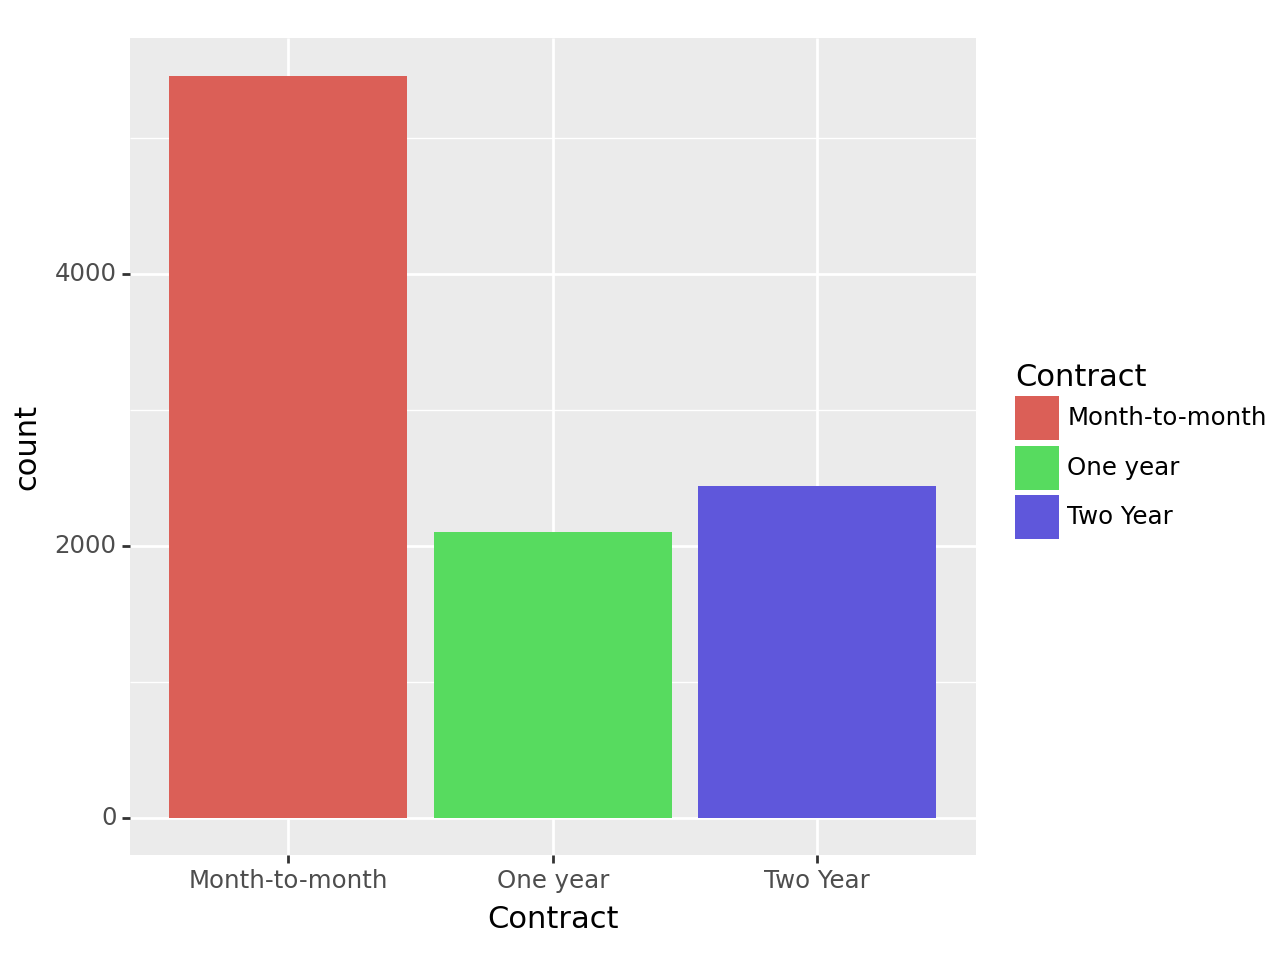

In [2]:
#Part C Code
#Univariate graphs

#Numerical
#Outage_sec_perweek
print(csv["Outage_sec_perweek"].describe())
print(p9.ggplot(csv) + p9.aes(x = "Outage_sec_perweek") + p9.geom_density())
#Tenure
print(csv["Tenure"].describe())
print(p9.ggplot(csv) + p9.aes(x = "Tenure") + p9.geom_density())

#Categorical
#Churn
print(csv["Churn"].value_counts())
print(p9.ggplot(csv) + p9.aes(x = "Churn", fill="Churn") + p9.geom_bar())
#Contract
print(csv["Contract"].value_counts())
print(p9.ggplot(csv) + p9.aes(x = "Contract", fill="Contract") + p9.geom_bar())

Slope: [81.93866838]
Intercept: [563.3116736]
R squared: 0.9830627160843524


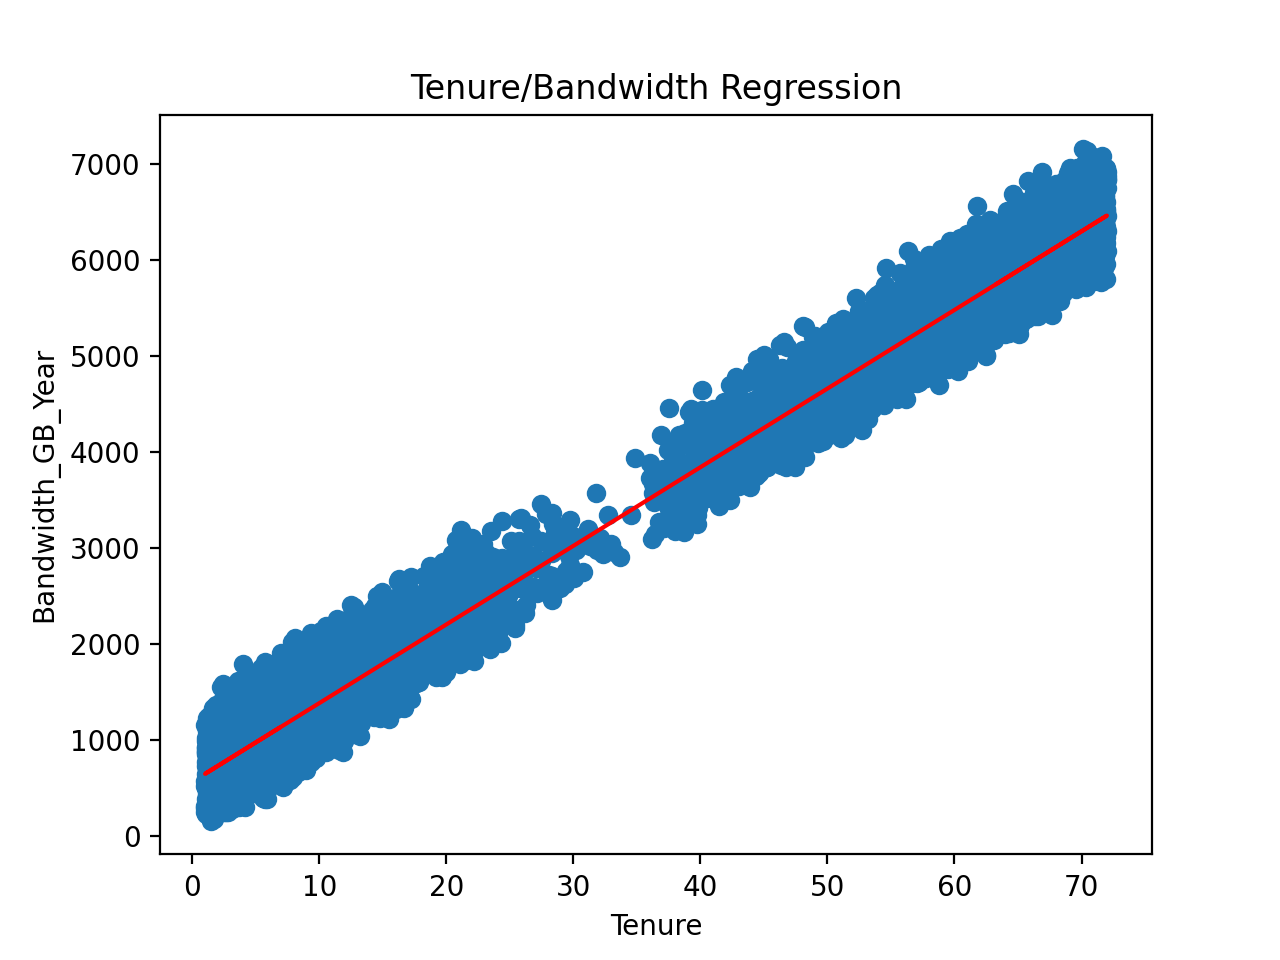

0.30185988850587486
Insignificant


c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002719CC34360> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002719CC34360> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
c:\Users\Mugenri\anaconda3\Lib\site-packages\plotnine\stats\stat_count.py:70: FutureWarning: The provided callable <function sum at 0x000002719CC34360> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
c:\Users\Mugenri\anaconda

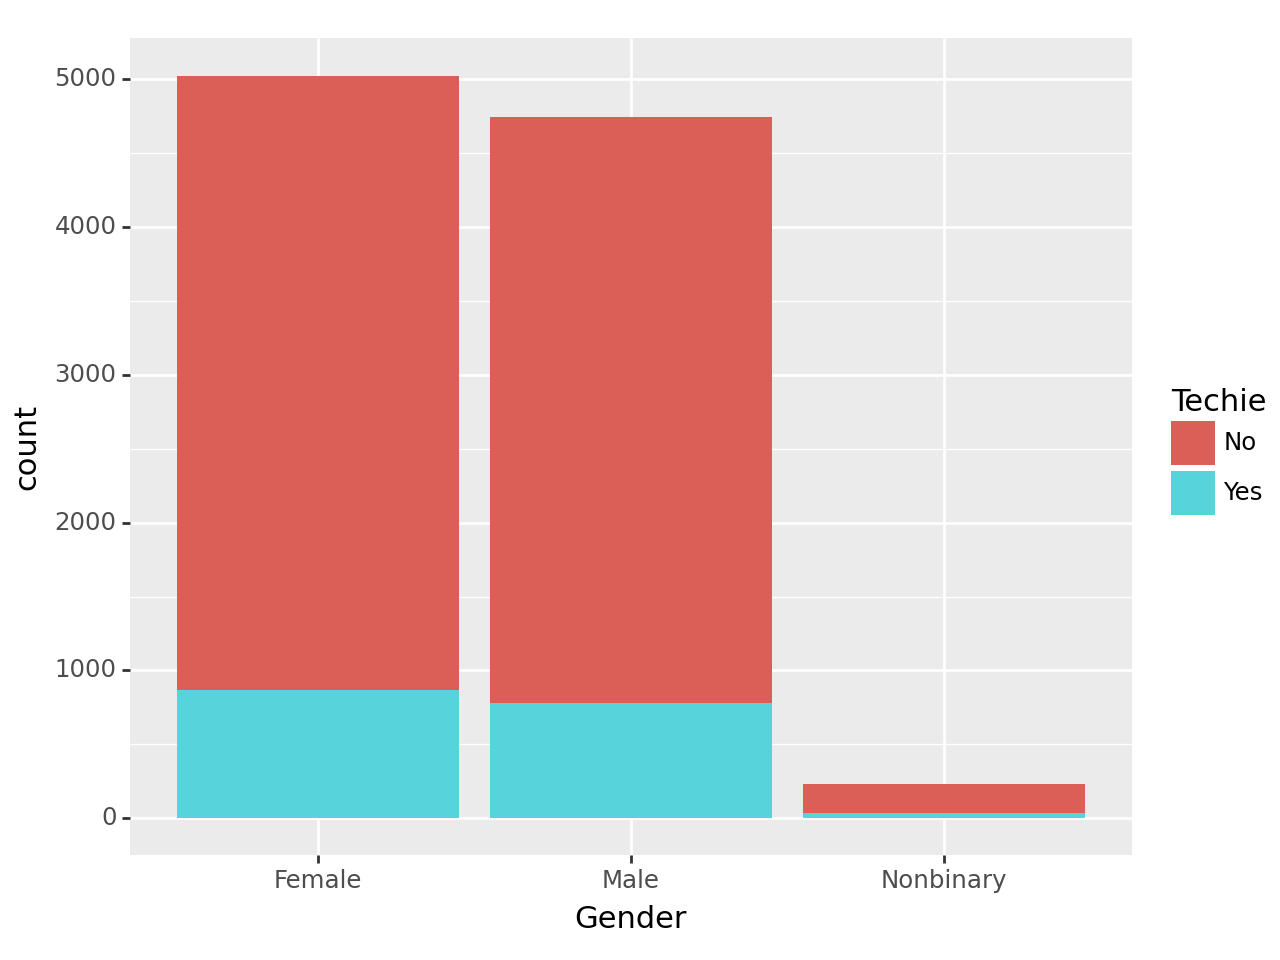

In [3]:
#Part D Code
#Bivariate graphs

#Numerical
#Tenure/Bandwidth relation
model = LinearRegression()
xAxis = csv.loc[:, "Tenure"].values.reshape(-1, 1)
yAxis = csv.loc[:, "Bandwidth_GB_Year"].values.reshape(-1, 1)
model.fit(xAxis, yAxis)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R squared:", model.score(xAxis, yAxis))

#visualization
plt.title("Tenure/Bandwidth Regression")
plt.xlabel("Tenure")
plt.ylabel("Bandwidth_GB_Year")
plt.scatter(xAxis, yAxis)
plt.plot(xAxis, model.predict(xAxis), color="red")
plt.show()

#Categorical
#Gender/Techie relation

#get table of values for all categories
observed = np.empty(shape=(3, 2))
for i, gender in enumerate(csv.Gender.unique()):
    yesTech = csv.loc[(csv.Techie == 'Yes') & (csv.Gender == gender)].shape[0]
    noTech = csv.loc[(csv.Techie == 'No') & (csv.Gender == gender)].shape[0]

    observed[i] = [yesTech, noTech]

#chi-square test
chi2, p, dof, expected, = chi2_contingency(observed)

print(p)

alpha = 0.05
if p < alpha:
    print("Significant")
else:
    print("Insignificant")

#visualization
print(p9.ggplot(csv) + p9.aes(x = "Gender", fill = "Techie") + p9.geom_bar())